# How to use Marcus Hush kinetics in ElectroKitty

This is a brief tutorial demonstrating how to use Marcus-Hush theory instead of Butler-Volmer.

To invoke Marcus-Hush we will declare that when we pass our simulation constants to ElectroKitty.

When we use Marcus-Hush theory the $\alpha$ parameter in the kinetic list declaration is now the reorganisation energy $\lambda$ with units eV.

We will simulate an EE mechanism under extreme transport conditions to demonstrate the effect that Marcus-Hush theory has on electrochemical signals.

As a quick cheat sheet:

    1. "BV" corresponds to Buler-Volmer
    2. "MH" corresponds to Marcus-Hush

In [5]:
from electrokitty import ElectroKitty
import numpy as np
import matplotlib.pyplot as plt

We will first get a signal using Butler-Volmer theory so that we can compare results to something.

Notice that when we call the create_simulation function we pass to it that the kinetic model should be "BV". 
This is not neccessary as that Butler-Volmer is the default. But it is here that we can choose what model to use in our simulation.

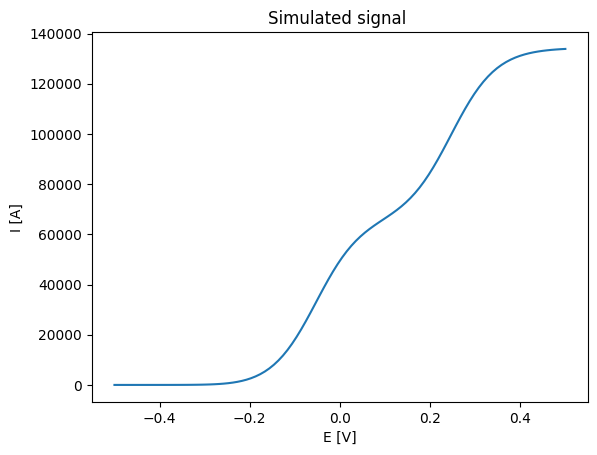

In [16]:
mechanism = "E(1): a = b \n E(1): b = c"

kins = [[0.5, 10, 0.15], [0.5, 10, -0.15]]

D = [10**0, 10**0, 10**0]

ic = [
      [],
      [0, 0, 100]
      ]

iso = []

cc = [293, 0, 0, 10**-4]

si = [0.0001, 20, 10**-5, 60]

problem1 = ElectroKitty(mechanism)
problem1.create_simulation(kins, cc, D, iso, si, ic, kinetic_model="BV")
problem1.LSV_potential(-0.5, 0.5, 0.01, 0., 0, 100)

e_bv, i_bv, t_bv = problem1.simulate()
problem1.Plot_simulation()

We will now do the same but now using the Marcus-Hush fomalism for the rate constants.

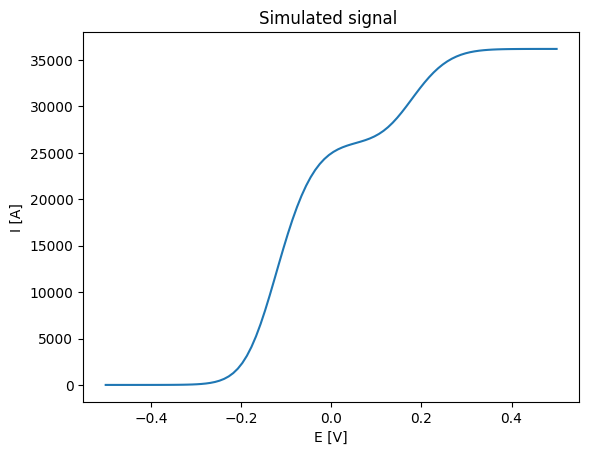

In [25]:
mechanism = "E(1): a = b \n E(1): b = c"

kins = [[0.05,10, 0.15], [0.05, 10, -0.15]] # lamda is a bit low just to exagerate the result

D = [10**0, 10**0, 10**0]

ic = [
      [],
      [0, 0, 100]
      ]

iso = []

cc = [293, 0, 0, 10**-4]

si = [0.0001, 20, 10**-5, 60]

problem1 = ElectroKitty(mechanism)
problem1.create_simulation(kins, cc, D, iso, si, ic, kinetic_model="MH") # here we declare that we want MH kinetics
problem1.LSV_potential(-0.5, 0.5, 0.01, 0., 0, 100)

e_mh, i_mh, t_mh = problem1.simulate()
problem1.Plot_simulation()

A plot together for better comparison

Text(0, 0.5, 'i')

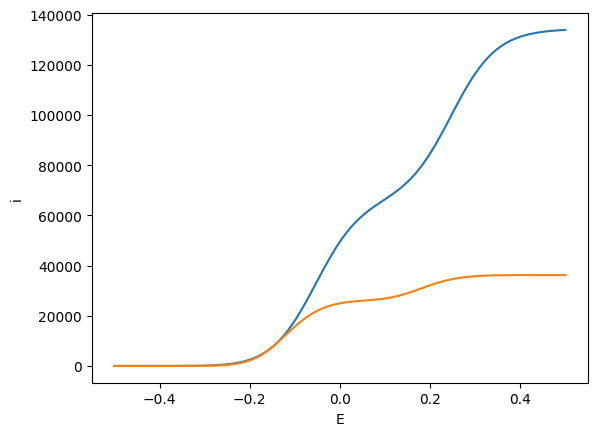

In [23]:
plt.plot(e_bv, i_bv, e_mh, i_mh)

plt.xlabel("E")
plt.ylabel("i")